In [40]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
from scipy.stats import chi2_contingency
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import re
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
#and visualization setup
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from matplotlib import cm
from sklearn import metrics

# helper for logistic regression explanations
from scipy.special import expit
from scipy.special import logit

# visualization libraries 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


from IPython.display import Image, display  
import pydotplus 
from scipy import misc



df=pd.read_csv('Data.csv',header=0,sep=',')
mycolors = ['#002856', '#EAC71B']
df.drop(columns = df.columns[0], inplace=True)
df


,ID,Name,Team,GP,Minute,Points,FGM,FGA,FG_P,3PM,...,BLK,TOV,EFF,BIO,Season Number,ASP,EFF_binned,Minute_binned,FGM_binned,Binary EFF
0,1,Luka Doncic,DAL,34,36.9,34.2,11.6,22.7,51.1,3.0,...,0.6,3.6,36.6,Luka Dončić (LOO-kuh DON-chitch) has put up hi...,1.0,0,4,4,4,1
1,2,Joel Embiid,PHI,27,35.4,33.2,11.1,21.0,52.8,1.0,...,1.7,3.9,34.9,Holds career averages of 16.4 points (.554% FG...,1.0,0,4,4,4,1
2,3,Giannis Antetokounmpo,MIL,30,33.7,32.1,11.5,21.5,53.3,0.8,...,0.9,3.8,32.4,2018-19 NBA MVP 3-time NBA All-Star Game start...,1.0,0,4,4,4,1
3,4,Jayson Tatum,BOS,35,36.9,30.9,10.1,21.4,47.3,3.2,...,0.9,2.7,29.8,"2019-20: Appeared in 66 games, averaging 23.4 ...",1.0,0,3,4,4,1
4,5,Shai Gilgeous-Alexander,OKC,33,35.7,30.8,10.3,20.6,49.9,1.0,...,1.0,3.3,29.6,Led all rookies on +.500 teams in scoring and ...,1.0,0,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2562,255,Quincy Acy,SAC,63,13.5,2.7,1.0,2.2,46.8,0.1,...,0.4,0.5,5.4,non,10.0,0,1,2,1,0
2563,256,Ryan Hollins,LAC,61,7.9,2.3,0.9,1.2,73.6,0.0,...,0.5,0.5,3.4,non,10.0,0,1,1,1,0
2564,257,Chuck Hayes,TOR,61,12.3,2.2,0.9,2.1,43.1,0.0,...,0.2,0.5,5.1,non,10.0,0,1,2,1,0
2565,258,Garrett Temple,WAS,75,8.5,1.8,0.7,1.9,36.2,0.1,...,0.1,0.6,2.4,non,10.0,0,1,1,1,0


In [41]:
#df.drop(columns = df.columns[0], inplace=True)
#df.drop(columns=df.columns[0], inplace=True)


In [42]:
df.head()

,ID,Name,Team,GP,Minute,Points,FGM,FGA,FG_P,3PM,...,BLK,TOV,EFF,BIO,Season Number,ASP,EFF_binned,Minute_binned,FGM_binned,Binary EFF
0,1,Luka Doncic,DAL,34,36.9,34.2,11.6,22.7,51.1,3.0,...,0.6,3.6,36.6,Luka Dončić (LOO-kuh DON-chitch) has put up hi...,1.0,0,4,4,4,1
1,2,Joel Embiid,PHI,27,35.4,33.2,11.1,21.0,52.8,1.0,...,1.7,3.9,34.9,Holds career averages of 16.4 points (.554% FG...,1.0,0,4,4,4,1
2,3,Giannis Antetokounmpo,MIL,30,33.7,32.1,11.5,21.5,53.3,0.8,...,0.9,3.8,32.4,2018-19 NBA MVP 3-time NBA All-Star Game start...,1.0,0,4,4,4,1
3,4,Jayson Tatum,BOS,35,36.9,30.9,10.1,21.4,47.3,3.2,...,0.9,2.7,29.8,"2019-20: Appeared in 66 games, averaging 23.4 ...",1.0,0,3,4,4,1
4,5,Shai Gilgeous-Alexander,OKC,33,35.7,30.8,10.3,20.6,49.9,1.0,...,1.0,3.3,29.6,Led all rookies on +.500 teams in scoring and ...,1.0,0,3,4,4,1


In [43]:
df.info()
df.duplicated().sum()# test for duplicated lines 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2567 entries, 0 to 2566
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             2567 non-null   int64  
 1   Name           2567 non-null   object 
 2   Team           2567 non-null   object 
 3   GP             2567 non-null   int64  
 4   Minute         2567 non-null   float64
 5   Points         2567 non-null   float64
 6   FGM            2567 non-null   float64
 7   FGA            2567 non-null   float64
 8   FG_P           2567 non-null   float64
 9   3PM            2567 non-null   float64
 10  3PA            2567 non-null   float64
 11  3P%            2567 non-null   float64
 12  FTM            2567 non-null   float64
 13  FTA            2567 non-null   float64
 14  FT%            2567 non-null   float64
 15  OREB           2567 non-null   float64
 16  DREB           2567 non-null   float64
 17  REB            2567 non-null   float64
 18  AST     

0

(array([ 30.,  40.,  36.,  56.,  52.,  39.,   9.,   0.,   0.,   0.,   1.,
          3.,   5.,  31.,  32.,  42.,  93., 120., 156.,  81., 156., 179.,
        180., 152., 199., 172., 172., 163., 224., 144.]),
 array([26. , 27.9, 29.8, 31.7, 33.6, 35.5, 37.4, 39.3, 41.2, 43.1, 45. ,
        46.9, 48.8, 50.7, 52.6, 54.5, 56.4, 58.3, 60.2, 62.1, 64. , 65.9,
        67.8, 69.7, 71.6, 73.5, 75.4, 77.3, 79.2, 81.1, 83. ]),
 <BarContainer object of 30 artists>)

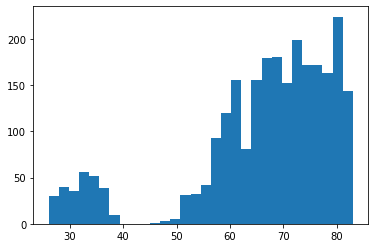

In [44]:
plt.hist(df["GP"],bins=30)#שכיחות כמות משחקים ששוחקו ביחס לכמות מופעים 


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  2.,  3.,  2.,
         6.,  1.,  2.,  3.,  4.,  5., 10.,  7., 15., 10., 13.,  7.,  9.,
        22., 20., 27., 18., 24., 35., 27., 29., 36., 31., 44., 26., 27.,
        41., 33., 39., 51., 26., 46., 35., 32., 33., 33., 38., 27., 32.,
        49., 28., 41., 25., 31., 45., 39., 34., 47., 37., 36., 51., 35.,
        37., 47., 33., 61., 33., 38., 37., 31., 50., 29., 36., 53., 31.,
        54., 37., 43., 45., 34., 37., 43., 42., 47., 35., 31., 39., 22.,
        30., 29., 15., 19.,  2.,  4.,  5.,  2.,  4.]),
 array([ 4.9  ,  5.238,  5.576,  5.914,  6.252,  6.59 ,  6.928,  7.266,
         7.604,  7.942,  8.28 ,  8.618,  8.956,  9.294,  9.632,  9.97 ,
        10.308, 10.646, 10.984, 11.322, 11.66 , 11.998, 12.336, 12.674,
        13.012, 13.35 , 13.688, 14.026, 14.364, 14.702, 15.04 , 15.378,
        15.716, 16.054, 16.392, 16.73 , 17.068, 17.406, 17.744, 18.082,
        18.42 , 18.758, 19.096, 19.434, 19.772, 20.11 , 20.448, 20.786,
  

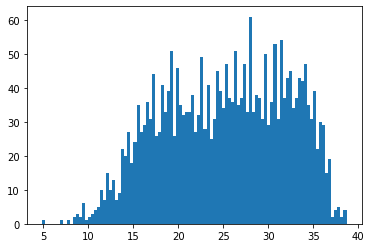

In [45]:
plt.hist(df["Minute"],bins=100)#שכיחות של דקות משחק ביחס לכמות למופעים

In [46]:
# אפשר לחשב E[X] עי כמות זריקות לחלק כמות קליעות כפול סיגמה שרצה על כמות השחקנים  
#נחשב הסתברות לבחירת שחקן שקלע למעלה מ11 קליעות במשחק
df.FGM[df.FGM>10].count()/df.FGM.count()

0.01090767432800935

In [47]:
#sns.boxplot(df.GP)
df.describe(include='all')

,ID,Name,Team,GP,Minute,Points,FGM,FGA,FG_P,3PM,...,BLK,TOV,EFF,BIO,Season Number,ASP,EFF_binned,Minute_binned,FGM_binned,Binary EFF
count,2567.000000,2567,2567,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,...,2567.000000,2567.000000,2567.000000,2567,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000,2567.000000
unique,NaN,741,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,311,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Harrison Barnes,SAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,non,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1175,NaN,NaN,NaN,NaN,NaN,NaN
mean,129.189326,NaN,NaN,66.133619,25.213635,11.450604,4.227152,9.136424,46.519322,1.116478,...,0.499649,1.430541,12.944916,NaN,5.585898,0.073627,1.772887,3.019868,1.873393,0.073237
std,74.697358,NaN,NaN,13.847420,6.848963,5.928296,2.097149,4.426886,6.623254,0.873872,...,0.445297,0.800678,6.009578,NaN,2.867210,0.261213,0.699792,0.764567,0.783663,0.260576
min,1.000000,NaN,NaN,26.000000,4.900000,1.000000,0.300000,0.800000,30.500000,0.000000,...,0.000000,0.200000,1.300000,NaN,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,65.000000,NaN,NaN,61.000000,19.550000,7.000000,2.700000,5.700000,42.100000,0.400000,...,0.200000,0.800000,8.600000,NaN,3.000000,0.000000,1.000000,2.000000,1.000000,0.000000
50%,129.000000,NaN,NaN,69.000000,25.600000,10.100000,3.700000,8.200000,45.100000,1.000000,...,0.400000,1.300000,11.800000,NaN,6.000000,0.000000,2.000000,3.000000,2.000000,0.000000
75%,193.000000,NaN,NaN,76.000000,31.000000,14.600000,5.500000,11.800000,49.300000,1.700000,...,0.600000,1.800000,16.100000,NaN,8.000000,0.000000,2.000000,4.000000,2.000000,0.000000


In [48]:
bins=[0,10,20,30,40]#0<x<=n
labels=[1,2,3,4]
df['EFF_binned']=pd.cut(df['EFF'],bins,labels=labels)
df['Minute_binned']=pd.cut(df['Minute'],bins,labels=labels)
df.EFF_binned.max()
df.head()

,ID,Name,Team,GP,Minute,Points,FGM,FGA,FG_P,3PM,...,BLK,TOV,EFF,BIO,Season Number,ASP,EFF_binned,Minute_binned,FGM_binned,Binary EFF
0,1,Luka Doncic,DAL,34,36.9,34.2,11.6,22.7,51.1,3.0,...,0.6,3.6,36.6,Luka Dončić (LOO-kuh DON-chitch) has put up hi...,1.0,0,4,4,4,1
1,2,Joel Embiid,PHI,27,35.4,33.2,11.1,21.0,52.8,1.0,...,1.7,3.9,34.9,Holds career averages of 16.4 points (.554% FG...,1.0,0,4,4,4,1
2,3,Giannis Antetokounmpo,MIL,30,33.7,32.1,11.5,21.5,53.3,0.8,...,0.9,3.8,32.4,2018-19 NBA MVP 3-time NBA All-Star Game start...,1.0,0,4,4,4,1
3,4,Jayson Tatum,BOS,35,36.9,30.9,10.1,21.4,47.3,3.2,...,0.9,2.7,29.8,"2019-20: Appeared in 66 games, averaging 23.4 ...",1.0,0,3,4,4,1
4,5,Shai Gilgeous-Alexander,OKC,33,35.7,30.8,10.3,20.6,49.9,1.0,...,1.0,3.3,29.6,Led all rookies on +.500 teams in scoring and ...,1.0,0,3,4,4,1


In [49]:
FGM_bins=[0,3,6,9,12]#0<x<=n
df['FGM_binned']=pd.cut(df['FGM'],FGM_bins,labels=labels)

(array([ 952.,    0.,    0., 1280.,    0.,    0.,  301.,    0.,    0.,
          34.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

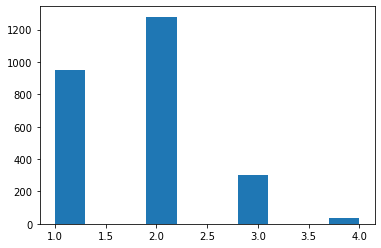

In [50]:
plt.hist(df["EFF_binned"])#EFF frequency by division into 4 groups

(14074.457269978102,
 0.771321807211279,
 14200,
 array([[0.00623296, 0.00623296, 0.01246591, ..., 0.00623296, 0.00623296,
         0.00623296],
        [0.00545384, 0.00545384, 0.01090767, ..., 0.00545384, 0.00545384,
         0.00545384],
        [0.0077912 , 0.0077912 , 0.01558239, ..., 0.0077912 , 0.0077912 ,
         0.0077912 ],
        ...,
        [0.04674718, 0.04674718, 0.09349435, ..., 0.04674718, 0.04674718,
         0.04674718],
        [0.05531749, 0.05531749, 0.11063498, ..., 0.05531749, 0.05531749,
         0.05531749],
        [0.00077912, 0.00077912, 0.00155824, ..., 0.00077912, 0.00077912,
         0.00077912]]))

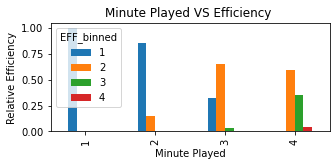

In [51]:
ct2=pd.crosstab(df['Minute_binned'],df['EFF_binned'],normalize='index')
ct1=pd.crosstab(df['GP'],df['EFF'])
ct2
ct2.plot(kind='bar',figsize=(5,2))
plt.title('Minute Played VS Efficiency ')
plt.xlabel('Minute Played')
plt.ylabel('Relative Efficiency')#מוזר לראות שכמות המשחקים ששחקן שיחק ורמת היעלות של השחקן
chi2_contingency(ct1)# אינם תלוים זה בזה על פי מבחן חי בריבוע
#ct1=pd.crosstab(df['Minute'],df['FTA'])
#chi2_contingency(ct1)

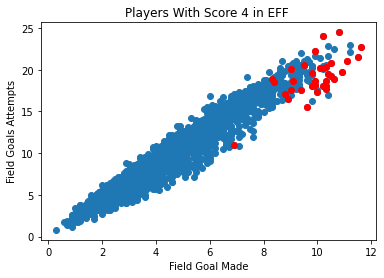

In [52]:
fig=plt.figure()
ax=plt.axes()
ax.scatter(df.FGM,df.FGA)
plt.title('Players With Score 4 in EFF ')
plt.xlabel('Field Goal Made')
plt.ylabel('Field Goals Attempts')
ax.scatter(df.FGM[df.EFF_binned>=4],df.FGA[df.EFF_binned>=4],c='red')
plt.show()

<AxesSubplot:ylabel='EFF_binned'>

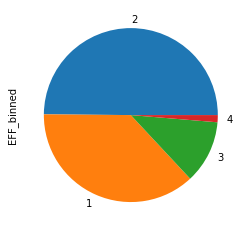

In [53]:
df.EFF_binned.value_counts().plot(kind='pie')


<AxesSubplot:ylabel='ASP'>

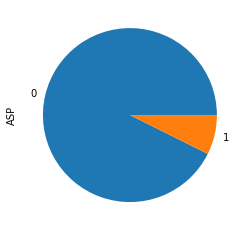

In [54]:
df.ASP.value_counts().plot(kind='pie')

<AxesSubplot:>

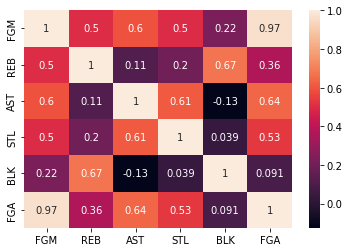

In [55]:

df2 = pd.DataFrame(df, columns = ['FGM','REB', 'AST', 'STL', 'BLK','FGA'])
sns.heatmap(df2.corr(), annot=True)

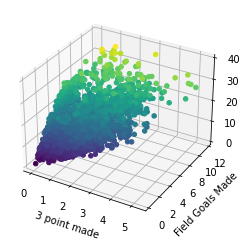

In [56]:
ax=plt.axes(projection='3d')
xdata=df['3PM']
ydata=df.FGM
zdata=df.EFF
plt.xlabel('3 point made')
plt.ylabel('Field Goals Made')
ax.scatter3D(xdata,ydata,zdata,c=zdata,depthshade=False)

In [57]:
df.EFF[df.EFF>=23].count()/df.EFF.count()#הסתברות לקבלת שחקן מקבוצה מעל רמת יעלות 32 היא בדיוק כמות השחקנים בAllStrar


0.07323724191663421

In [58]:
df.ASP[df.ASP==1].count()/df['ID'].count()#הסתברות להוצאת שחקן ALL STAR

0.0736268017140631

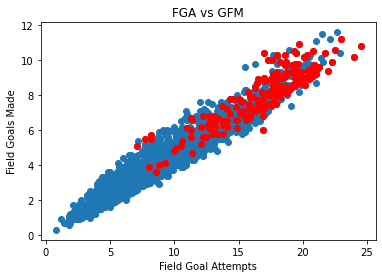

In [59]:
fig=plt.figure()
ax=plt.axes()
ax.scatter(df['FGA'], df['FGM'])
plt.title('FGA vs GFM')
plt.xlabel('Field Goal Attempts')
plt.ylabel('Field Goals Made')
ax.scatter(df['FGA'][df.ASP==1], df['FGM'][df.ASP==1], c='red')
plt.show()
#clear that there is a relationship

In [60]:
m=linear_model.LinearRegression().fit(df.iloc[:,7:8],df.iloc[:,6:7])

C:\Users\eldar\AppData\Local\Temp\ipykernel_20300\3403487083.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(df['FGA'],m.predict(df.iloc[:,7:8]),'k',color='blue',linewidth=3)


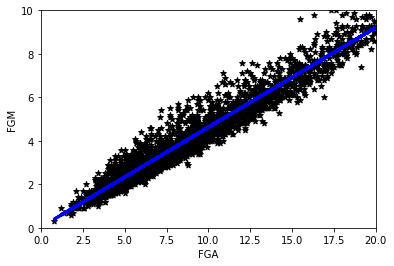

In [61]:
plt.scatter(x=df['FGA'],y= df['FGM'],c='k',marker='*',label='colors')
plt.plot(df['FGA'],m.predict(df.iloc[:,7:8]),'k',color='blue',linewidth=3)
plt.ylim(0,10)
plt.xlim(0,20)
plt.xlabel('FGA')
plt.ylabel('FGM')
plt.show()

In [62]:
def sse(Y, Y_HAT):
    sse = sum([(y - y_hat)**2 for y,y_hat in zip(Y, Y_HAT)])
    return sse

SSE = sse(df.FGM.tolist(),m.predict(df.iloc[:,7:8]).flatten())

print(SSE)

695.2833120660212


In [63]:
mean_squared_error(df.FGM.tolist(),m.predict(df.iloc[:,7:8]).flatten())*len(df.FGM.tolist())

695.283312066019

In [64]:
r2_score(df.FGM.tolist(),m.predict(df.iloc[:,7:8]).flatten())

0.9383906701151433

In [65]:
print("b1:",m.coef_)
print("b0:",m.intercept_)

b1: [[0.45890504]]
b0: [0.03440137]


In [66]:
m=linear_model.LinearRegression().fit(df.iloc[:,18:19],df.iloc[:,4:5])

C:\Users\eldar\AppData\Local\Temp\ipykernel_20300\2733418748.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(df['AST'],m.predict(df.iloc[:,18:19]),'k',color='blue',linewidth=3)


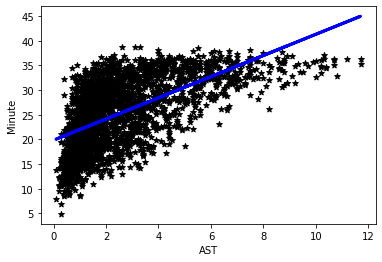

In [67]:
plt.scatter(x=df['AST'],y=df['Minute'],c='k',marker='*',label='Digital')
plt.plot(df['AST'],m.predict(df.iloc[:,18:19]),'k',color='blue',linewidth=3)

plt.xlabel('AST')
plt.ylabel('Minute')
plt.show()

In [68]:
print("b1:",m.coef_)
print("b0:",m.intercept_)

b1: [[2.14739778]]
b0: [19.8452238]


In [69]:
SSE = sse(df['Minute'].tolist(),m.predict(df.iloc[:,18:19]).flatten())

print(SSE)


76401.41607191163


In [70]:
mean_squared_error(df['Minute'].tolist(),m.predict(df.iloc[:,18:19]).flatten())*len(df['Minute'].tolist())

76401.41607191184

In [71]:
r2_score(df['Minute'].tolist(),m.predict(df.iloc[:,18:19]).flatten())

0.36526109799267104

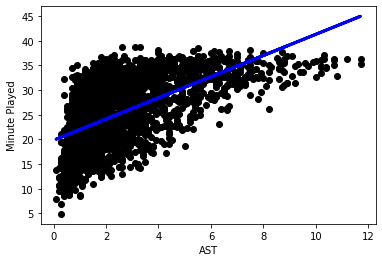

Slope: [[2.14739778]]
Intercept: [19.8452238]
R2: 0.36526109799267104


In [72]:
lr_ast = linear_model.LinearRegression() # create a linear regression object

# scikit-learn doesn't work as well with pandas, so we have to extract values 
x = df['AST'].values.reshape(df['AST'].shape[0],1)
y = df['Minute'].values.reshape(df['Minute'].shape[0],1)

lr_ast.fit(X=x, y=y)

plt.scatter(x, y,  color='black')
plt.plot(x, lr_ast.predict(x), color='blue', linewidth=3)

plt.xlabel('AST')
plt.ylabel('Minute Played')
plt.show()

print("Slope:",lr_ast.coef_)
print("Intercept:",lr_ast.intercept_)
print("R2:",lr_ast.score(x,y))

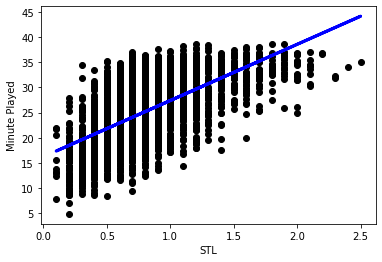

Slope: [[11.14742559]]
Intercept: [16.25834786]
R2: 0.4034274151508326


In [73]:
lr_stl = linear_model.LinearRegression() # create a linear regression object

# scikit-learn doesn't work as well with pandas, so we have to extract values 
x = df['STL'].values.reshape(df['STL'].shape[0],1)
y = df['Minute'].values.reshape(df['Minute'].shape[0],1)

lr_stl.fit(X=x, y=y)

plt.scatter(x, y,  color='black')
plt.plot(x, lr_stl.predict(x), color='blue', linewidth=3)

plt.xlabel('STL')
plt.ylabel('Minute Played')
plt.show()

print("Slope:",lr_stl.coef_)
print("Intercept:",lr_stl.intercept_)
print("R2:",lr_stl.score(x,y))

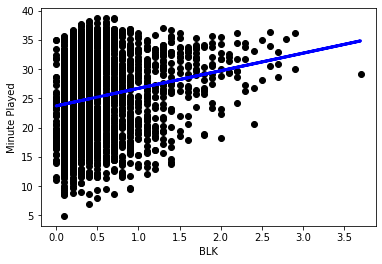

Slope: [[3.0041336]]
Intercept: [23.71262105]
R2: 0.03814938697448478


In [74]:
lr_blk = linear_model.LinearRegression() # create a linear regression object

# scikit-learn doesn't work as well with pandas, so we have to extract values 
x = df['BLK'].values.reshape(df['BLK'].shape[0],1)
y = df['Minute'].values.reshape(df['Minute'].shape[0],1)

lr_blk.fit(X=x, y=y)

plt.scatter(x, y,  color='black')
plt.plot(x, lr_blk.predict(x), color='blue', linewidth=3)

plt.xlabel('BLK')
plt.ylabel('Minute Played')
plt.show()

print("Slope:",lr_blk.coef_)
print("Intercept:",lr_blk.intercept_)
print("R2:",lr_blk.score(x,y))

C:\Users\eldar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


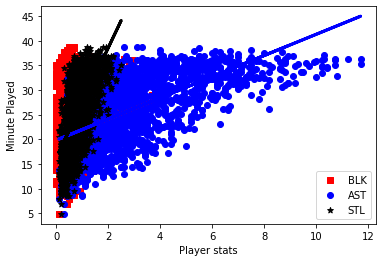

In [75]:
plt.scatter(x=df['BLK'],y=df['Minute'],c='r',marker='s',label='BLK')
plt.scatter(x=df['AST'],y=df['Minute'],c='b',marker='o',label='AST')
plt.scatter(x=df['STL'],y=df['Minute'],c='k',marker='*',label='STL')
plt.legend(numpoints=1,loc=4)

plt.plot(df['BLK'],m.predict(df['BLK'].values.reshape(df['BLK'].shape[0],1)),c='r',linewidth=3)
plt.plot(df['AST'],lr_ast.predict(df['AST'].values.reshape(df['AST'].shape[0],1)),c='b',linewidth=3)
plt.plot(df['STL'],lr_stl.predict(df['STL'].values.reshape(df['STL'].shape[0],1)),c='k',linewidth=3)
plt.xlabel('Player stats')
plt.ylabel('Minute Played')
plt.show()

In [76]:
lr = linear_model.LinearRegression() # create a linear regression object

x = df[['BLK',"AST","STL"]]
y = df['Minute']
lr.fit(X=x, y=y);
print("Slope:",lr.coef_)
print("Intercept:",lr.intercept_)

Slope: [3.5429304  1.41939733 6.69281366]
Intercept: 14.518300236287239


In [77]:
print("R2:",lr.score(x,y))
print("R2:",r2_score(y,lr.predict(x.values)))

R2: 0.5286377660535857
R2: 0.5286377660535857


C:\Users\eldar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(df.corr())
pd.plotting.scatter_matrix(df, figsize=(40, 40), diagonal='kde')
plt.show()

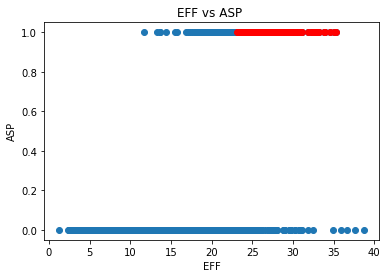

In [79]:

fig=plt.figure()
ax=plt.axes()
ax.scatter(df['EFF'], df['ASP'])
plt.title('EFF vs ASP ')
plt.xlabel('EFF')
plt.ylabel('ASP')
ax.scatter(df['EFF'][(df.ASP==1) & (df.EFF>=23)], df['ASP'][(df.ASP==1) & (df.EFF >= 23)], c='red')
plt.show()

In [80]:
lrm=linear_model.LogisticRegression()
lrm.fit(df[["EFF"]],df["ASP"])


LogisticRegression()

C:\Users\eldar\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


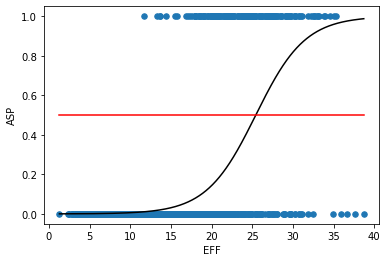

In [81]:
df.plot.scatter(x='EFF',y='ASP',s=30)

#create a set of points along the x axis to print prediction graph
x = np.linspace(df['EFF'].min(),df['EFF'].max(),1000)

#get probabilistic predictions for those points (using predict_proba)
y_pred_p=lrm.predict_proba(np.reshape(x, (-1, 1))) # we need to reshape x to get it to a 2 dimensional array

#get only the probability for the "pass" category
y_pred_p1=[y[1] for y in y_pred_p]

#plot the prediction graph
plt.plot(x,y_pred_p1,color='Black')

# this is an alternative plot option to calculate directly the predicted value, using the model paramters and avoiding predict_proba function
# you can uncomment the line below, and comment the line before and see the results
#plt.plot(x,expit(lrm.intercept_[0]+lrm.coef_[0][0]*x),color='green')

# draw the line of y=0.5 as the decision point
plt.plot(x,[0.5]*len(x),color="red")
plt.show()

In [82]:
#If my EFF is 25 points, what is the likelihood that I'll be all star player?
x=25
expit(lrm.intercept_[0]+lrm.coef_[0][0]*x)

0.46486004962491473

In [83]:
prob_passing = 0.46486004962491473
x = (logit(prob_passing) - lrm.intercept_[0])/lrm.coef_[0][0]
print(x)

24.999999999999996


In [84]:
y_pred = lrm.predict(df[["EFF"]])
y_actual=df["ASP"]
metrics.confusion_matrix(y_actual, y_pred)

array([[2334,   44],
       [ 119,   70]], dtype=int64)

In [85]:
print("accuracy is:",metrics.accuracy_score(y_actual, y_pred))
print("precision is:",metrics.precision_score(y_actual, y_pred))
print("recall is:",metrics.recall_score(y_actual, y_pred))
print("f1 is:",metrics.f1_score(y_actual, y_pred))

accuracy is: 0.9365017530190884
precision is: 0.6140350877192983
recall is: 0.37037037037037035
f1 is: 0.46204620462046203


In [86]:
df['Binary EFF'] = np.where(df['EFF']>=23, 1, 0)

In [87]:
def splitData(features):
    """Split a subset of the titanic dataset, given by the features, into train and test sets."""
    df_predictors = df[features].values
    df_labels = df["ASP"].values

    # Split into training and test sets
    XTrain, XTest, yTrain, yTest = train_test_split(df_predictors, df_labels, random_state=1, test_size=0.5)
    return XTrain, XTest, yTrain, yTest

In [88]:
def renderTree(my_tree, features):
    # hacky solution of writing to files and reading again
    # necessary due to library bugs
    filename = "temp.dot"
    with open(filename, 'w') as f:
        f = tree.export_graphviz(my_tree, 
                                 out_file=f, 
                                 feature_names=features, 
                                 class_names=["ALL STAR", "NOT ALL STAR"],  
                                 filled=True, 
                                 rounded=True,
                                 special_characters=True)
  
    dot_data = ""
    with open(filename, 'r') as f:
        dot_data = f.read()

    graph = pydotplus.graph_from_dot_data(dot_data)
    image_name = "temp.png"
    graph.write_png(image_name)  
    display(Image(filename=image_name))

Accuracy on training data =  0.9423226812159002
Accuracy on test data =  0.9338006230529595


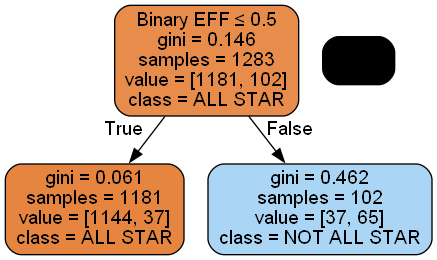

In [89]:
decisionTree = tree.DecisionTreeClassifier()

XTrain, XTest, yTrain, yTest = splitData(["Binary EFF"])
# fit the tree with the traing data
decisionTree = decisionTree.fit(XTrain, yTrain)

# predict with the training data
y_pred_train = decisionTree.predict(XTrain)
# measure accuracy
print('Accuracy on training data = ', 
      metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

# predict with the test data
y_pred = decisionTree.predict(XTest)
# measure accuracy
print('Accuracy on test data = ', 
      metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

renderTree(decisionTree, ["Binary EFF"])

Accuracy on training data=  1.0
Accuracy on test data=  0.9244548286604362


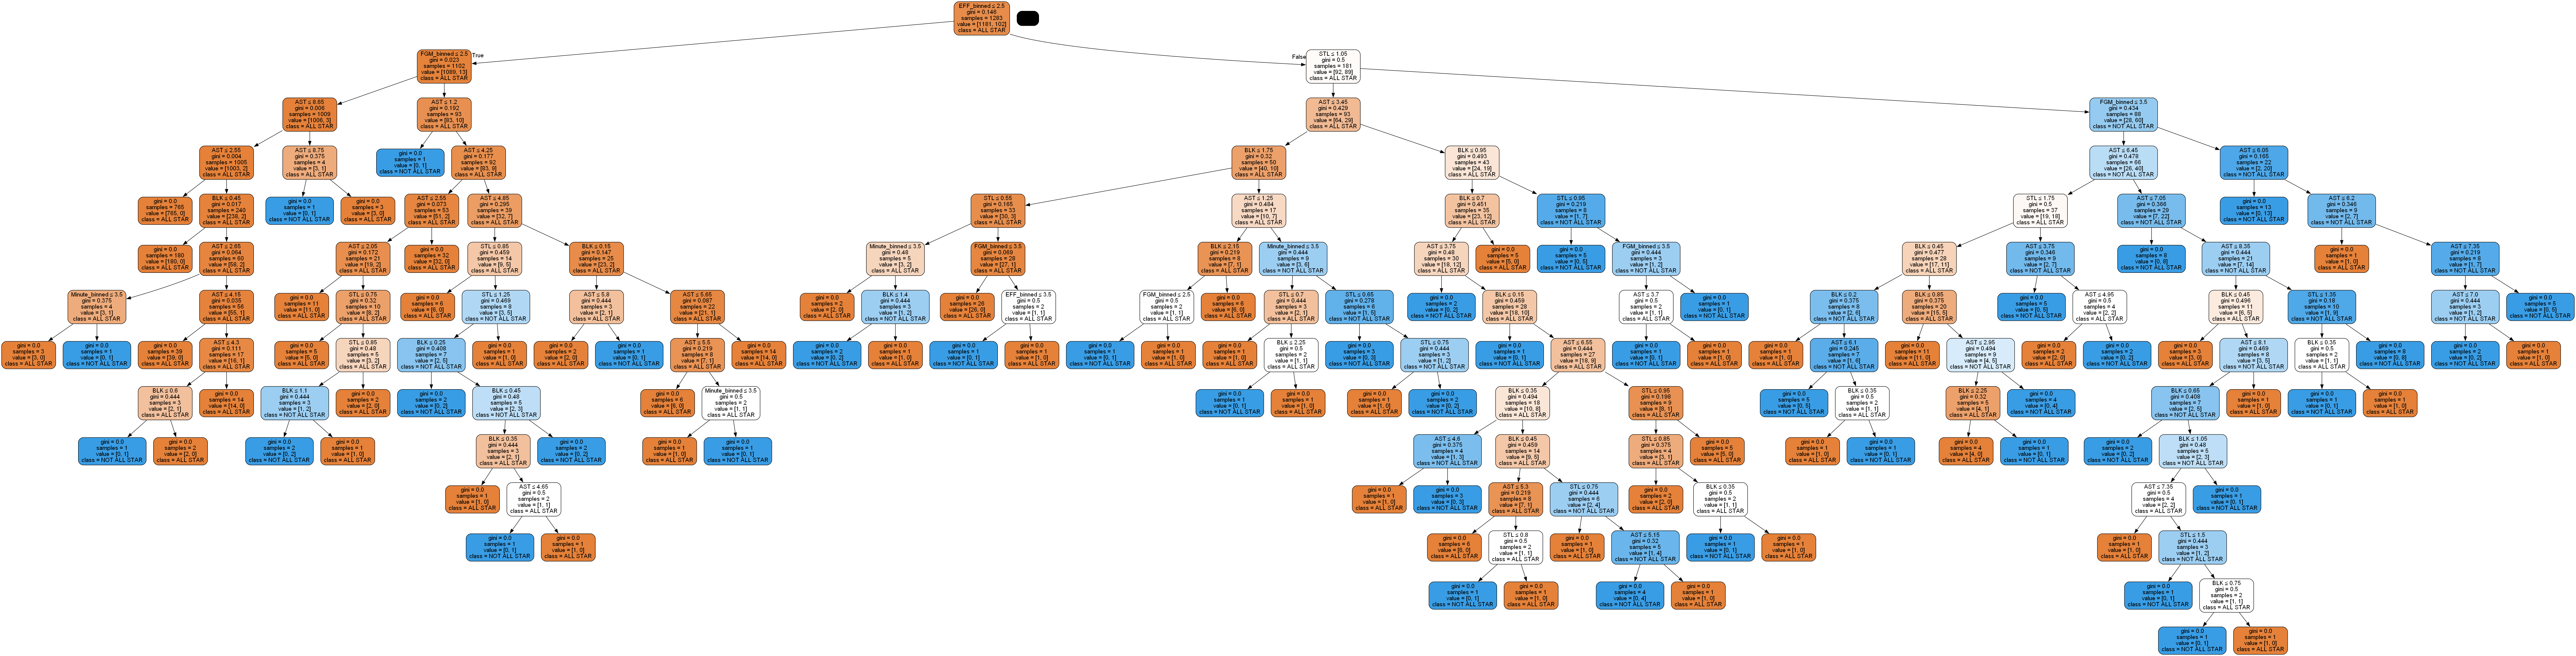

In [90]:
used_features = ["EFF_binned", "Minute_binned", "FGM_binned", 'STL', 'BLK', 'AST']
XTrain, XTest, yTrain, yTest = splitData(used_features)
decisionTree = tree.DecisionTreeClassifier()
decisionTree = decisionTree.fit(XTrain, yTrain)

y_pred_train = decisionTree.predict(XTrain)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

y_pred = decisionTree.predict(XTest)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))
renderTree(decisionTree, used_features)

In [91]:
forest =  RandomForestClassifier(bootstrap=True, n_estimators=300, random_state=0)

trained_forest = forest.fit(XTrain, yTrain) 

y_pred_train = trained_forest.predict(XTrain)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

y_pred = trained_forest.predict(XTest)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

Accuracy on training data=  1.0
Accuracy on test data=  0.9338006230529595


In [92]:
featuresDF=pd.DataFrame({"features":used_features,"weights":trained_forest.feature_importances_})
featuresDF.sort_values("weights",ascending=False)

,features,weights
5,AST,0.241354
0,EFF_binned,0.214948
4,BLK,0.172905
3,STL,0.164828
2,FGM_binned,0.141984
1,Minute_binned,0.063982


In [93]:
parameters = {'max_depth':[2,4,6],"min_samples_split":[5,10,20,25,50] }
dt = tree.DecisionTreeClassifier()

clf = GridSearchCV(dt, parameters,scoring=make_scorer(metrics.accuracy_score, greater_is_better=True))
clf.fit(XTrain, yTrain)

print("best parameter set is:",clf.best_params_," and its score was",clf.best_score_)

best parameter set is: {'max_depth': 4, 'min_samples_split': 10}  and its score was 0.9392205739299611


In [94]:
parameters = {'n_estimators':range(50,551,100) }
rf = RandomForestClassifier()

clf = GridSearchCV(rf, parameters,scoring=make_scorer(metrics.accuracy_score, greater_is_better=True))
clf.fit(XTrain, yTrain)

print("best parameter set is:",clf.best_params_," and its score was",clf.best_score_)

best parameter set is: {'n_estimators': 150}  and its score was 0.9431116245136186


Accuracy on training data=  0.9516757599376462
Accuracy on test data=  0.9345794392523364


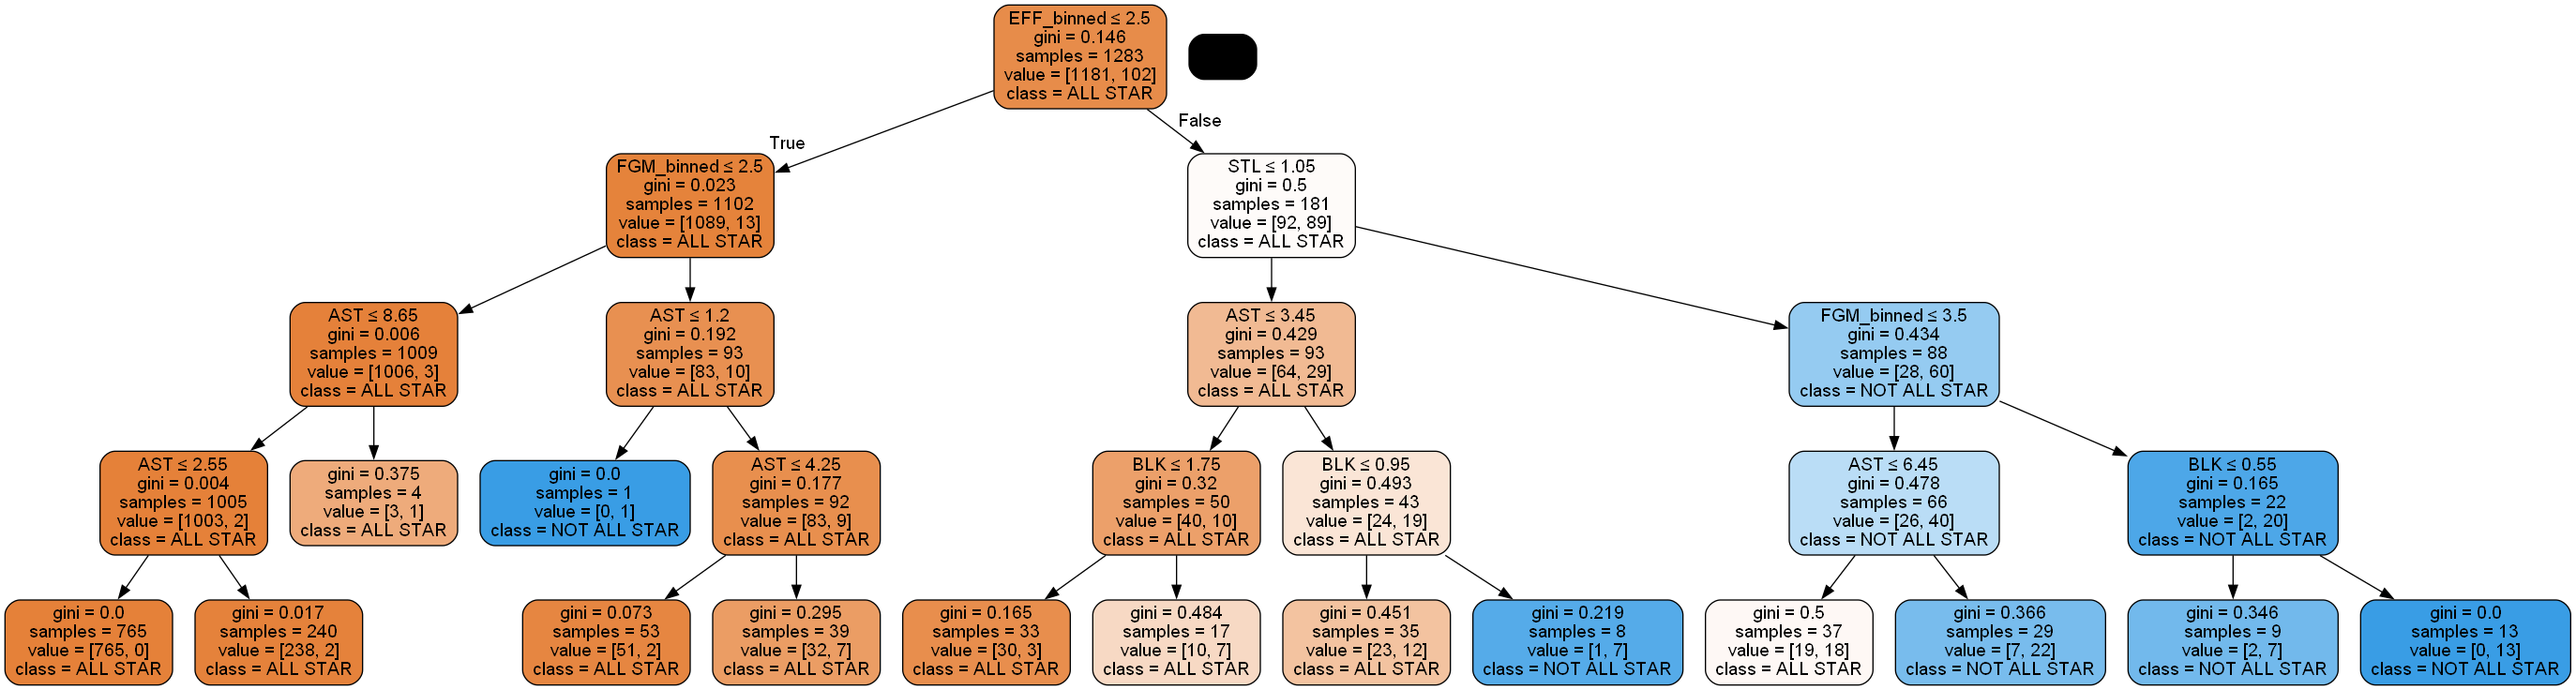

In [95]:
used_features = ["EFF_binned", "Minute_binned", "FGM_binned", 'STL', 'BLK', 'AST']
XTrain, XTest, yTrain, yTest = splitData(used_features)
decisionTree = tree.DecisionTreeClassifier(max_depth=4, min_samples_split=5)
decisionTree = decisionTree.fit(XTrain, yTrain)

y_pred_train = decisionTree.predict(XTrain)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

y_pred = decisionTree.predict(XTest)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))
renderTree(decisionTree, used_features)

In [96]:
forest =  RandomForestClassifier(bootstrap=True, n_estimators=450, random_state=0)

trained_forest = forest.fit(XTrain, yTrain) 

y_pred_train = trained_forest.predict(XTrain)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

y_pred = trained_forest.predict(XTest)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))

Accuracy on training data=  1.0
Accuracy on test data=  0.9353582554517134


In [97]:
pattern1 = "PROFESSIONAL CAREER\n"
pattern2 = "BEFORE NBA\n"
pattern3 = "PERSONAL LIFE\n"
for index in range(len(df['BIO'])):
    if df['BIO'][index] == 'non':
        continue
    else:
        df['BIO'][index] = re.sub(pattern1, "", df['BIO'][index])
        df['BIO'][index] = re.sub(pattern2, "", df['BIO'][index])
        df['BIO'][index] = re.sub(pattern3, "", df['BIO'][index])
        df['BIO'][index] = df['BIO'][index].lower()


C:\Users\eldar\AppData\Local\Temp\ipykernel_20300\2676075742.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BIO'][index] = re.sub(pattern1, "", df['BIO'][index])
C:\Users\eldar\AppData\Local\Temp\ipykernel_20300\2676075742.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BIO'][index] = re.sub(pattern2, "", df['BIO'][index])
C:\Users\eldar\AppData\Local\Temp\ipykernel_20300\2676075742.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

In [99]:
vectorizer = CountVectorizer(lowercase=True, stop_words="english")
X = vectorizer.fit_transform(df["BIO"])
X.toarray()
print(vectorizer.get_feature_names_out())

['00' '000' '000th' ... 'zoubek' 'zylan' 'šarić']


In [100]:
totalWord=np.sum(X)
print("total words",totalWord)
totalUniqueWords=X.shape[1]
print("total unique words",totalUniqueWords)

#you could also get it by this:
print("total unique words (take 2)",len(vectorizer.get_feature_names_out()))

total words 857863
total unique words 7583
total unique words (take 2) 7583


In [101]:
import pandas as pd
import numpy as np
import nltk
from PIL import Image
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from PIL import Image

from wordcloud import WordCloud

In [107]:
lines = []
for bio in df['BIO']:
    bio = bio.strip().lower()
    if len(bio)==0:
        continue
    if bio == 'non':
        continue
    lines.append(bio)
text = " ".join(lines)

In [108]:
vectorizer=CountVectorizer(stop_words="english")
freq_vec=vectorizer.fit_transform([text]).toarray() # the function requires as input an array of docs..
freqDist=dict(zip(vectorizer.get_feature_names_out(),freq_vec[0])) # create a dictionary from the first (and only) row
freqDist=dict(sorted(freqDist.items(), key=lambda item: item[1],reverse=True)) # ascending sort..
#freqDist

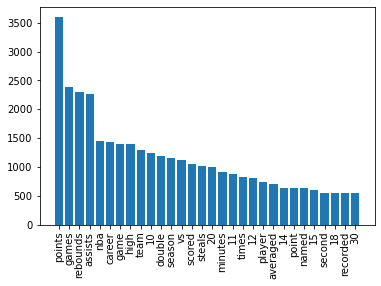

In [134]:
topK= 30
plt.bar(list(freqDist.keys())[:topK], list(freqDist.values())[:topK])
plt.xticks(list(freqDist.keys())[:topK], rotation='vertical')
plt.show()

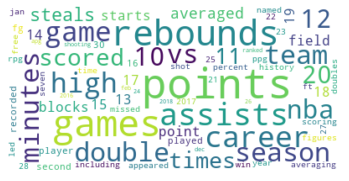

In [117]:
wordcloud = WordCloud(max_font_size=50, max_words=75, background_color="white").generate_from_frequencies(freqDist)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

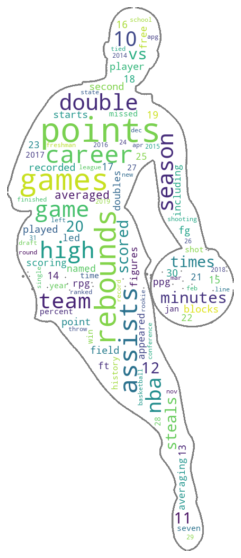

In [119]:
def transform_format(val):
    if val != 0:
        return 255
    else:
        return val

    
image_file=Image.open("nba_logo.jpg")
image_file=image_file.convert('1')
nba_mask = np.array(image_file)

transformed_nba_mask = np.ndarray((nba_mask.shape[0],nba_mask.shape[1]), np.int32)

for i in range(len(nba_mask)):
    transformed_nba_mask[i] = list(map(transform_format, nba_mask[i]))

wc = WordCloud(background_color="white", max_words=100, mask=transformed_nba_mask,contour_width=3, contour_color='gray')

wc=wc.generate_from_frequencies(freqDist)
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [130]:
lines = []
for bio in df.BIO[df.ASP==1]:
    bio = bio.strip().lower()
    if len(bio)==0:
        continue
    if bio == 'non':
        continue
    lines.append(bio)
text = " ".join(lines)


In [131]:
vectorizer=CountVectorizer(stop_words="english")
freq_vec=vectorizer.fit_transform([text]).toarray() # the function requires as input an array of docs..
freqDist=dict(zip(vectorizer.get_feature_names_out(),freq_vec[0])) # create a dictionary from the first (and only) row
freqDist=dict(sorted(freqDist.items(), key=lambda item: item[1],reverse=True)) # ascending sort..
#freqDist

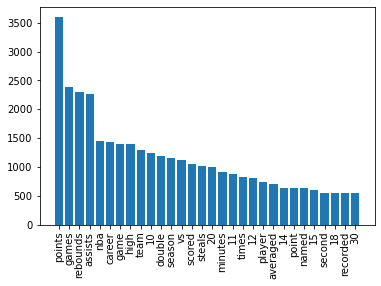

In [133]:
topK= 30
plt.bar(list(freqDist.keys())[:topK], list(freqDist.values())[:topK])
plt.xticks(list(freqDist.keys())[:topK], rotation='vertical')
plt.show()